#<b>TASK - 2 Data Science And Business Analytics Internship

##<b>By Sneha Pisal Intern at The Sparks Foundation

<b>TASK - Predict the percentage of an student based on the no. of study hours.   

In [1]:
#import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading data 
data=pd.read_csv('C:/Users/DELL/Desktop/file.csv')

In [3]:
data.shape

(25, 2)

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
#Check whether data has null values or not
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

Since , There is no single missing value in the data we can do visualization

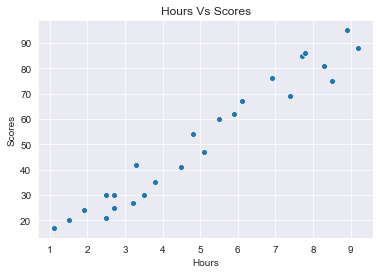

In [7]:
sns.set_style('darkgrid')
sns.scatterplot(x=data.Hours,y=data.Scores)
plt.title('Hours Vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

We can see from above scatterplot that there is a relationship between Hours studied and percentage scored.Lets plot the line to confirm the correlation 

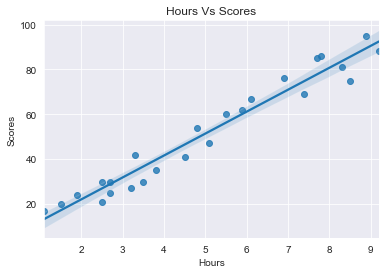

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [8]:
sns.regplot(x=data.Hours,y=data.Scores)
plt.title('Hours Vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()
print(data.corr())

Thus,It is confirmed that Hours and Scores are positively correlated


In [9]:
#splitting of data into attributes(Hours) and labels(Scores)
X = data.iloc[:, :1].values  
Y = data.iloc[:, -1].values

In [10]:
#splitting of data into training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [11]:
#Using LR model fitting of data
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,Y_train)
print(regression.intercept_)
print(regression.coef_)
print('-----Model Trained------')

2.018160041434683
[9.91065648]
-----Model Trained------


In [12]:
#Making predictions
pred_Y=regression.predict(X_test)
df=pd.DataFrame({'Actual Values':Y_test,'Predicted Values':pred_Y})
df

,Actual Values,Predicted Values
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [13]:
#Calculating the accuracy of the model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print('Mean absolute error: ',mean_absolute_error(Y_test,pred_Y))
print('R2 Score:',r2_score(Y_test,pred_Y))

Mean absolute error:  4.183859899002975
R2 Score: 0.9454906892105356


In [14]:
#To predict score if student studies for 9.25hr/day
Hours=[9.25]
answer=regression.predict([Hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.692


According to model if student studies for 9.25hr/day then,he/she likely to get <b>93.893 score